In [1]:
import pandas as pd

from predict_sales import PredictSales

In [2]:
train_data = pd.read_csv("train_v9rqX0R.csv")
test_data = pd.read_csv("test_AbJTz2l.csv")

In [5]:
for q in [10]:
    print(q)
    obj = PredictSales(q)
    output = obj.predict_sales_amt(train_data, test_data) 


10
(8523, 19) (5681, 19)
dict_keys(['dt', 'rf', 'ab', 'gb', 'xgb']) [1240.1520128049428, 1058.3075899248936, 1102.1985933203991, 1038.3643736663907, 1073.9667186071015]


In [7]:
out = pd.read_csv("first_output_10_15_pct_test_encoded_outliers_treated_no_fine_tune.csv")
out.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2175.226946
std,1297.940514
min,1.137199
25%,1104.163360
50%,2078.140490
75%,3090.907997
max,6830.476471


In [9]:
out['Item_Outlet_Sales'] = out['Item_Outlet_Sales'].apply(lambda x: 0 if x < 0 else x)
out.describe()

,Item_Outlet_Sales
count,5681.000000
mean,2177.955617
std,1279.537934
min,0.000000
25%,1131.227341
50%,2067.886269
75%,3083.186639
max,6188.904917


In [11]:
out.to_csv("first_output_10_encoded_outliers_treated_grid_search.csv", index=False)

In [7]:
(test_y, pred), (train_y, pred_tr), (y, pred_all) = output[1], output[2], output[3]

In [9]:
te = pd.DataFrame({'act': test_y, 'pred': pred})
te['diff'] = te['act'] - te['pred']

tr = pd.DataFrame({'act': train_y, 'pred': pred_tr})
tr['diff'] = te['act'] - te['pred']

d = pd.DataFrame({'act': y, 'pred': pred_all})
d['diff'] = d['act'] - d['pred']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

sns.set()
plt.rcParams['figure.figsize'] = (15, 5)
warnings.filterwarnings("ignore")

In [17]:
te.sort_values('diff')

,act,pred,diff
64,2543.3560,7256.275879,-4712.919879
1255,1541.9928,5612.889160,-4070.896360
6505,1917.5040,5881.782715,-3964.278715
3615,460.7336,4368.327637,-3907.594037
1924,1263.0226,4933.624512,-3670.601912
...,...,...,...
1043,7152.0236,3228.522217,3923.501383
3154,8912.3988,4881.595215,4030.803585
2549,6381.6930,1878.537598,4503.155402
373,7763.2280,2809.340088,4953.887912


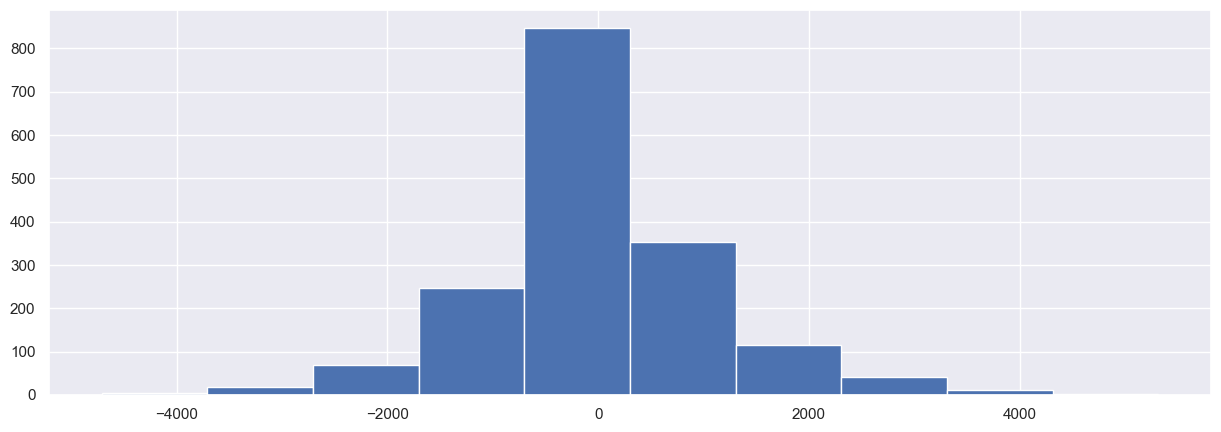

In [15]:
plt.hist(te['diff'])
plt.show()

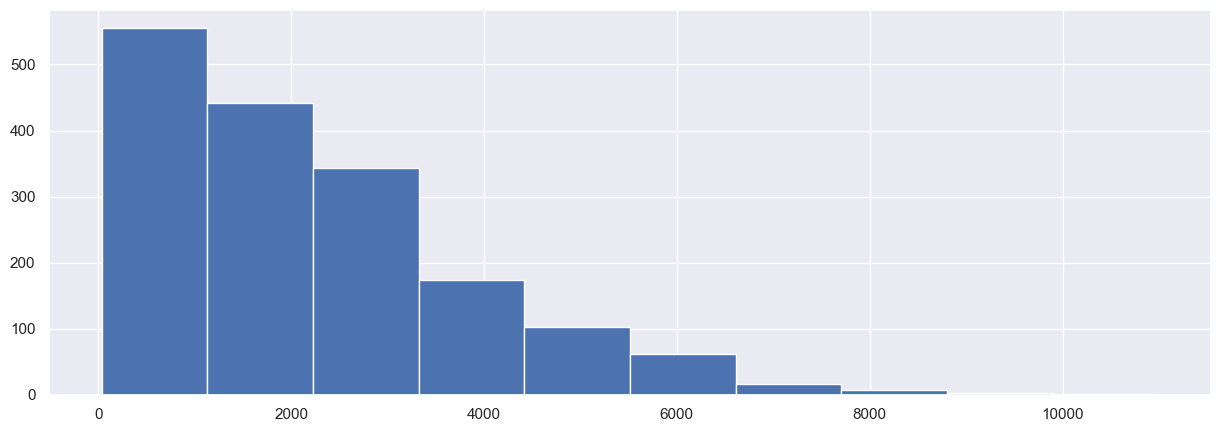

In [21]:
plt.hist(te['act'])
plt.show()

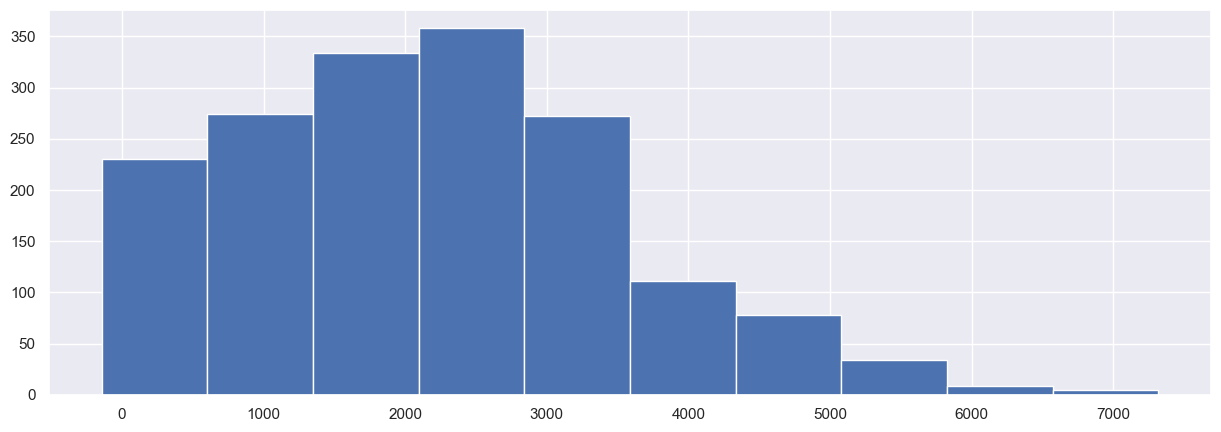

In [25]:
plt.hist(te['pred'])
plt.show()

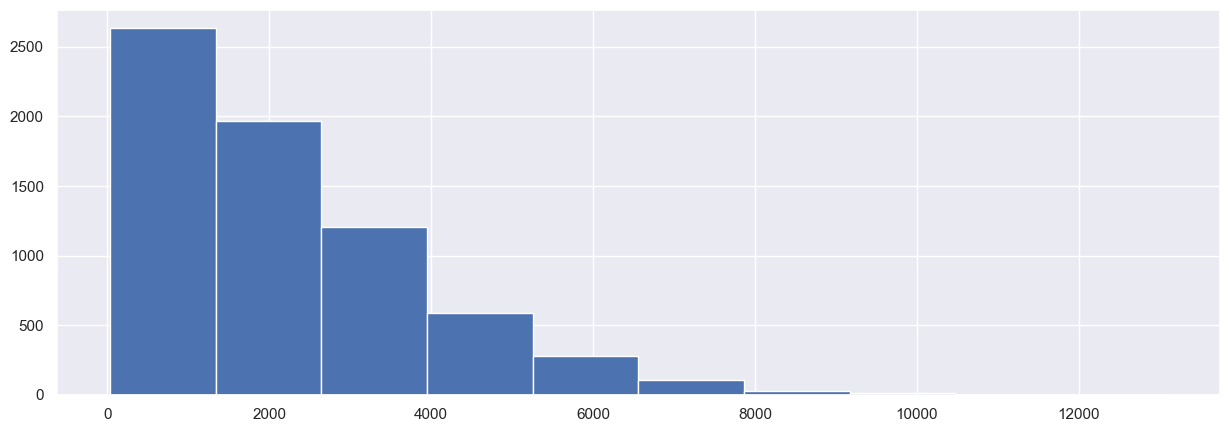

In [23]:
plt.hist(tr['act'])
plt.show()